# Step 11: Map plots

In [1]:
import pandas as pd
from techminer import RecordsDataFrame

rdf = RecordsDataFrame(
    pd.read_json(
        'step-06.json', 
        orient='records', 
        lines=True))

In [2]:
rdf.crosscorrelation(
    termA='Authors',
    termB='Authors',
    sepA=',',
    sepB=',',
    N=10).tomatrix()

,Raudys A.,Sadoghi M.,Masteika S.,Luk W.,Maringer D.,Ng W.L.,Debenham J.,Jacobsen H.-A.,Manahov V.,Hudson R.
Raudys A.,1.000000,0.0,0.158114,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Sadoghi M.,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
Masteika S.,0.158114,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Luk W.,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Maringer D.,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000
Ng W.L.,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000
Debenham J.,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
Jacobsen H.-A.,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
Manahov V.,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.566947
Hudson R.,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.566947,1.000000


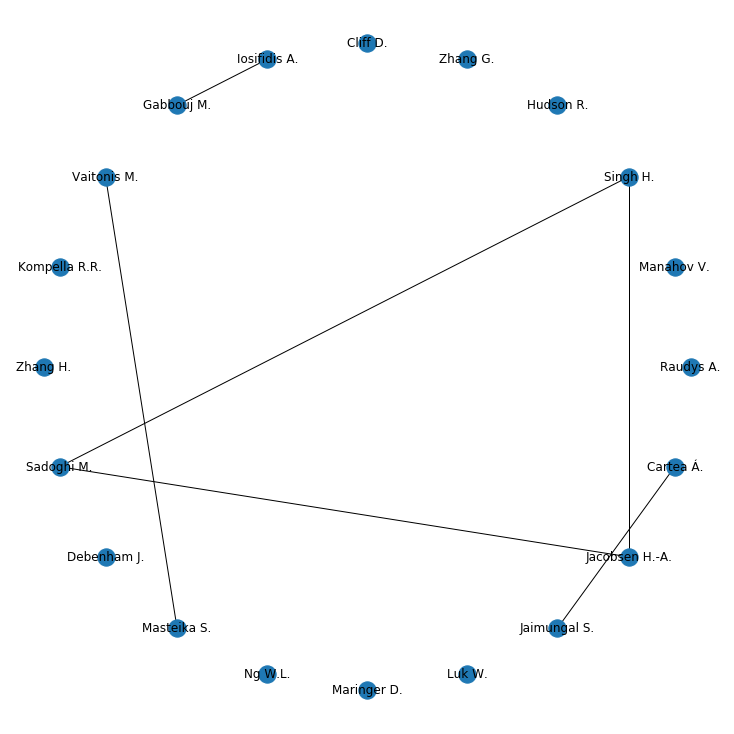

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

def crosscorr_map(x, figsize = (10,10)):
        
        def add_edges(m, weight):
            
            if len(m) == 0:
                return
            m = list(m[name0])
            for i in range(len(m)):
                for j in range(i+1, len(m)):
                    graph.add_edge(m[i], m[j], weight=weight)
           
        
        ## nombres de las columnas
        name0 = x.columns[0]
        name1 = x.columns[1]
        name2 = x.columns[2]
        
        x = x.copy()
        x['selected'] = x[name2].map(lambda z: z >= 0.25 or z <= -0.25)
        x = x[x.selected]


        # generate a network graph
        plt.figure(figsize=figsize)
        graph = nx.Graph()
        rows = x[name0]
        nodes = list(set(rows))
        graph.add_nodes_from(nodes)


        for col in list(set(x[name1])):
            
            m = x[x[name1] == col]
            
            add_edges(m[m[name2] >= 0.75], weight=3)
            
            m = m[m[name2] < 0.75]
            add_edges(m[m[name2] >= 0.50], weight=2)
            
            m = m[m[name2] < 0.50]
            add_edges(m[m[name2] >= 0.25], weight=1)
            
            m = m[m[name2] < 0.25]
            add_edges(m[m[name2] <= -0.25], weight=0.5)
            

        #calculate distance between relationated nodes to avoid overlaping
        path_length = nx.shortest_path_length(graph)
        distances = pd.DataFrame(index=graph.nodes(), columns=graph.nodes())
        for row, data in path_length:
            for col, dist in data.items():
                distances.loc[row,col] = dist
        distances = distances.fillna(distances.max().max())

        #layout of graph
        pos = nx.kamada_kawai_layout(graph, dist=distances.to_dict())

        #weights and colors of the relationships between nodes for edges thickness 
        #weights = dict(((u, v), int(d["weight"])) for u, v, d in graph.edges(data=True))
        #colors = dict(((u, v), d["color"]) for u, v, d in graph.edges(data=True))

        #Edges weights for plot
        #max_=max([i for i in weights.values()])
        #min_=min([i for i in weights.values()])
        #min_range=1
        #max_range=5
        #if max_<=1:
        #    width = ([(1+x)*2 for x in weights.values()])  
        #else:
        #    width = ([((((x-min_)/(max_-min_))*(max_range-min_range))+min_range) for x in weights.values()]) 
            # width=list(weights.values())

        #node sizes
        #if not node_size:
        #    node_sizes = dict(graph.degree())
        #    node_sizes = ([(x)*10 for key,x in node_sizes.items()])  
        #else:
        #    node_sizes=node_size

        #visual graph configuration
        nx.draw(graph, pos, with_labels=True)




crosscorr_map(rdf.crosscorrelation(
    termA='Authors',
    termB='Authors',
    sepA=',',
    sepB=',',
    N=20))

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def autocorr_map(x, figsize = (10,10)):
    
        plt.figure(figsize=figsize)
        
        #generate network graph
        graph = nx.Graph()
        rows = x.columns[0]
        nodes = list(set(rows))
        graph.add_nodes_from(nodes)
        
        for index, r in x.iterrows():
            row = r[0]
            col = r[1]
            val = r[2]
            if row != col:
                if abs(val) > 0.4:
                    graph.add_edge(row, col, weight=abs(val))

                        
        #calculate distance between relationated nodes to avoid overlaping
        path_length = nx.shortest_path_length(graph)
        distances = pd.DataFrame(index=graph.nodes(), columns=graph.nodes())
        for row, data in path_length:
            for col, dist in data.items():
                distances.loc[row,col] = dist
        distances = distances.fillna(distances.max().max())

        #layout of graph
        pos = nx.kamada_kawai_layout(graph, dist=distances.to_dict())

        #weights and colors of the relationships between nodes for edges thickness 
        #weights = dict(((u, v), int(d["weight"])) for u, v, d in graph.edges(data=True))
        #colors = dict(((u, v), d["color"]) for u, v, d in graph.edges(data=True))

        #Edges weights for plot
        #max_=max([i for i in weights.values()])
        #min_=min([i for i in weights.values()])
        #min_range=1
        #max_range=5
        #if max_<=1:
        #    width = ([(1+x)*2 for x in weights.values()])  
        #else:
        #    width = ([((((x-min_)/(max_-min_))*(max_range-min_range))+min_range) for x in weights.values()]) 
            # width=list(weights.values())
    
        #node sizes
        #if not node_size:
        #    node_sizes = dict(graph.degree())
        #    node_sizes = ([(x)*10 for key,x in node_sizes.items()])  
        #else:
        #    node_sizes=node_size

        #visual graph configuration
        nx.draw(graph, pos, with_labels=True)
                    



autocorr_map(rdf.autocorrelation(
    term='keywords (cleaned)',
    sep=';'))

In [ ]:
[1] * 30

In [ ]:
rdf.term_by_term(
    termA='Authors', 
    termB='Author Keywords', 
    sepA=',', 
    sepB=';',
    minmax=(2,4)).tomatrix()

In [ ]:
rdf.term_by_term(
    termA='Authors', 
    termB='Author Keywords', 
    sepA=',', 
    sepB=';',
    minmax=(2,4)).network(figsize=(12,12), fond_size=9);

In [ ]:
x = rdf.crosscorrelation(
    termA='Authors', 
    termB='Author Keywords', 
    sepA=',', 
    sepB=';', 
    N=20)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def cross_relation_plot(x, figsize=(7,10)):
    
    llabels = list(set(x[x.columns[0]]))
    lpos = {k:v for v, k in enumerate(llabels)}
    
    rlabels = list(set(x[x.columns[1]]))
    rpos = {k:v for v, k in enumerate(rlabels)}
    
    fig, ax1 = plt.subplots(figsize=(7, 10))
    ax1.scatter([0] * len(llabels), llabels, color='black', s=50)
    ax2 = ax1.twinx()
    ax2.scatter([1] * len(rlabels), rlabels, color='black', s=50)
    
    minval = min(x[x.columns[2]])
    maxval = max(x[x.columns[2]])
            
    for index, r in x.iterrows():
        row = r[0]
        col = r[1]
        val = r[2]
        linewidth = 3 * (val - minval) / maxval
        plt.plot([0, 1], [lpos[row], rpos[col]], linewidth=linewidth, color='black')


    for txt in ['bottom', 'top', 'left', 'right']:
        ax1.spines[txt].set_color('white')
        ax2.spines[txt].set_color('white')
    
    ax2.set_xticks([])
    

cross_relation_plot(x)

In [ ]:
x = rdf.autocorrelation(
    term='Author Keywords', 
    sep=';', 
    N=20)
x.head(20)

In [ ]:


def radial_plot(x, figsize=(12, 12), minval=0, R=3):
    
    def bezier(p0, p1, p2, n=100, linewidth=1):
        x0, y0 = p0
        x1, y1 = p1
        x2, y2 = p2
        
        xb = [(1 - t)**2 *x0 + 2 * t * (1-t)*x1 + t**2 * x2 for t in np.linspace(0.0, 1.0, n)]
        yb = [(1 - t)**2 * y0 + 2 * t * (1-t)*y1 + t**2 * y2 for t in np.linspace(0.0, 1.0, n)]
    
        plt.plot(xb, yb, color='black', linewidth=linewidth)
    
    plt.figure(figsize=figsize)
    labels = list(set(x[x.columns[0]]))
    n_labels = len(labels)
    
    theta = np.linspace(0.0, 2 * np.pi, n_labels, endpoint=False)
    points_x = [R * np.cos(t) for t in theta]
    points_y = [R * np.sin(t) for t in theta]
    
    
    
    
    # dibuja los puntos sobre la circunferencia
    plt.scatter(points_x, points_y, s=80, color='black')
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', 'box')
    
    # arcos de las relaciones    
    data = {label:(points_x[idx], points_y[idx], theta[idx]) for idx, label in enumerate(labels)}
    
    n = 0
    
    maxval = max(x[x.columns[2]])
    
    textprops = {}
    textprops.setdefault('clip_on', False)
    
    for index, r in x.iterrows():
        row = r[0]
        col = r[1]
        val = r[2]
        #linewidth = 3 * (val - minval) / maxval
        if row != col and val > minval:
            linewidth = 2
            x0, y0, a0 = data[row]
            x2, y2, a2 = data[col]            
            
            angle = a0 + (a2 - a0) / 2
            
            if angle > np.pi:
                angle_corr = angle - np.pi
            else:
                angle_corr = angle
                
            distance = np.abs(a2 - a0)
            if distance > np.pi:
                distance = distance - np.pi
            distance = (1.0 - 1.0 * distance / np.pi) * R / 2.5
            x1 = distance * np.cos(angle)
            y1 = distance * np.sin(angle)
            
            linewidth = 2 * val / maxval
                    
            bezier( [x0, y0], [x1, y1], [x2, y2], linewidth=linewidth)
                
    
    ## labels
    lbl_x = [(R+0.2) * np.cos(t) for t in theta]
    lbl_y = [(R+0.2) * np.sin(t) for t in theta]
    lbl_theta = [t / (2 * np.pi) * 360 for t in theta]
    lbl_theta = [t - 180 if t > 180 else t for t in lbl_theta]
    lbl_theta = [t - 180 if t > 90 else t for t in lbl_theta]
    
    maxlen = max([len(lbl) for lbl in labels])
    
    for txt, xt, yt, angletxt, angle  in zip(labels, lbl_x, lbl_y, lbl_theta, theta):
            
        if xt >= 0:
            ha = 'left'
        else:
            ha = 'right'
    
        plt.text(
            xt, 
            yt, 
            txt, 
            fontsize=10,
            rotation=angletxt,
            va = 'center',
            ha = ha, # 'center'
            rotation_mode = 'anchor',
            backgroundcolor='white')
                
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    for txt in ['bottom', 'top', 'left', 'right']:
        plt.gca().spines[txt].set_color('white')
        
    
radial_plot(x)